# 🔥 California Wildfire Exploratory Data Analysis 🔥
In this notebook we perform an exploratory data analysis of California Wildfires using a variety of data science techniques including data cleaning, data preprocessing, synthetic data generation and data visualization techniques. We wrap up by summarizing key takeaways.

## Prerequsites
In this section we will install the necessary packages and import them as needed.

### Install Packages
Uncomemnt to install packages as needed

In [1]:
#%pip install pandas
#%pip install numpy
#%pip install seaborn
#%pip install matplotlib
#%pip install scikit-learn

### Import Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Getting Data
The California Department of Forestry and Fire Protection (CAL FIRE) maintains historical data about wildfires in California. This is a summary dataset that is hosted by Cornell University Center for Advance Computing - https://www.cac.cornell.edu/

We start by reading the dataset into a Pandas DataFrame

In [3]:
# Reading the data
df = pd.read_csv('calfires-2016.csv')

## Basic Data Inspection
Before we move forward with our analysis, we can perform some basic data inspection

### Data Shape
Let's start by look at the shape of the data, i.e. how many records we have and the number of columns or features in the dataset

In [4]:
# check data size
df.shape

(11795, 14)

We have approximately 11,700 rows across 14 features

### Data Features
Next, we look at the specific column names in the dataset also known as the features of the data

In [5]:
# check the data features / column 
df.columns

Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')

We can also get additional information about the features like the their specific data types. For example we see most of the features in our data have an object data type, which is in correct. We will fix those later.

In [6]:
# Get additional data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        11789 non-null  object 
 1   STATE       11795 non-null  object 
 2   AGENCY      11795 non-null  object 
 3   UNIT_ID     11794 non-null  object 
 4   FIRE_NAME   11769 non-null  object 
 5   INC_NUM     11720 non-null  object 
 6   ALARM_DATE  11795 non-null  object 
 7   CONT_DATE   11795 non-null  object 
 8   CAUSE       11795 non-null  object 
 9   COMMENTS    1961 non-null   object 
 10  REPORT_AC   11795 non-null  object 
 11  GIS_ACRES   11795 non-null  float64
 12  C_METHOD    11795 non-null  object 
 13  OBJECTIVE   11795 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


### Data Sample
We sample the first 10 row to get a better idea of the data. We notice that some of the features have missing or incorrect values. We will handle them in the data cleaning section.

In [7]:
df.head(10)

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)
5,1898,California,Contract County,Ventura County,LOS PADRES,0,9/1/1898,<Null>,14 - Unknown / Unidentified,NaN,<Null>,20539.9500,<Null>,Suppression (Wildfire)
6,1898,California,Contract County,Ventura County,MATILIJA,0,4/1/1898,<Null>,14 - Unknown / Unidentified,NaN,<Null>,2641.1230,<Null>,Suppression (Wildfire)
7,1898,California,Contract County,Ventura County,COZY DELL,0,9/1/1898,<Null>,14 - Unknown / Unidentified,NaN,<Null>,2974.5850,<Null>,Suppression (Wildfire)
8,1900,California,California Department of Forestry and Fire Pro...,Riverside CAL FIRE,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,978.7541,<Null>,Suppression (Wildfire)
9,1900,California,Contract County,Los Angeles County,BIG FIRE,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,2521.0640,<Null>,Suppression (Wildfire)


## Data Cleaning
In this section we will clean the data like removing null values, fixing the incorrect data types we identified earlier and removing some incorrect data entries.

### Missing Values
When we check for missing values, we notice that they are not in the correct format. Strings (object) are used to represent some of them. This will result in python packages misinterpreting them. We will fix them first.

In [8]:
df.isnull()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11790,True,False,False,False,False,False,False,False,False,True,False,False,False,False
11791,True,False,False,False,False,False,False,False,False,True,False,False,False,False
11792,True,False,False,False,False,False,False,False,False,True,False,False,False,False
11793,True,False,False,False,False,False,False,False,False,True,False,False,False,False


In [9]:
#Replace missing values with the NaN numpy datatype for analysis
df = df.replace('<Null>', np.nan)

In [10]:
# checking missing values after the fix
df.isnull()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,False,False,False,False,False,False,True,True,False,True,True,False,True,False
1,False,False,False,False,False,False,True,True,False,True,True,False,True,False
2,False,False,False,False,False,False,True,True,False,True,True,False,True,False
3,False,False,False,False,False,False,True,True,False,True,True,False,True,False
4,False,False,False,False,False,False,True,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11790,True,False,False,False,False,False,True,True,False,True,True,False,True,False
11791,True,False,False,False,False,False,True,True,False,True,True,False,True,False
11792,True,False,False,False,False,False,True,True,False,True,True,False,True,False
11793,True,False,False,False,False,False,True,True,False,True,True,False,True,False


### Fixing Data Types
We noticed above that the date features (YEAR, CONT_DATE and ALARM_DATE) did not have the correct data type and are listed as strings instead of date. We will fix them so we can run numeric date operations on these later.

In [11]:
df['YEAR']= pd.to_datetime(df['YEAR'])
df['CONT_DATE']= pd.to_datetime(df['CONT_DATE'])
df['ALARM_DATE']= pd.to_datetime(df['ALARM_DATE'])

We also need to convert the `REPORT_AC` column that represents the reported numder of acres burned to numeric.

In [12]:
df['REPORT_AC'] = pd.to_numeric(df['REPORT_AC'],errors = 'coerce')

### Generating Duration
We will generate a new feature for the duration of the fire, that is will be the difference between the alarm date and the containment date.

In [13]:
df['DURATION'] = (df['CONT_DATE'] - df['ALARM_DATE']).dt.days

### Incorrect Entries
If we check the max and min values of duration, we notice that some fires have a negative duration. Which is not possible and is likely due to an error in data entry.We will remove these incorrect entries from our dataset.

In [14]:
print(df['DURATION'].min(), df['DURATION'].max())

-292.0 3662.0


In [15]:
# Drop incorrect data entries (drop values less than 0 and more than 3000)
df = df[(df.DURATION >= 0) & (df.DURATION < 3000)]

In [16]:
# checking to make sure everything is correct
print(df['DURATION'].min(), df['DURATION'].max())

0.0 377.0


### Data Statistics 
We now get some descriptive statistics about the numeric features in our dataset. In our case we can check get the statistics for `REPORT_AC`, `GIS_ACRES` and `DURATION` 

In [17]:
df.describe()

,REPORT_AC,GIS_ACRES,DURATION
count,2856.000000,2959.000000,2959.000000
mean,4668.079614,4615.164787,13.898614
std,19268.317415,18917.183394,29.697936
min,0.000000,100.066100,0.000000
25%,200.000000,209.590200,1.000000
50%,508.500000,526.757500,3.000000
75%,2000.000000,2006.242500,10.000000
max,499945.000000,501082.000000,377.000000


## Verify Data Quality
After the data cleaning steps are done. Let's verify the data quality to understand our data a bit more.

### Missing Data
Check which features have missing data and how much. We notice that the comments column has most of the missing data. Since we are not using comments as part of our data analysis. We will ignore it.

<Figure size 720x432 with 0 Axes>

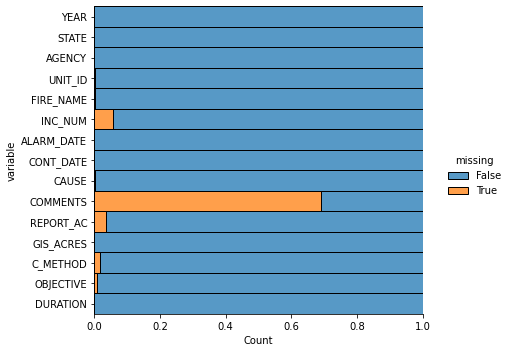

In [18]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
#plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### Data Source
We can also check how the data for each of the records was collected. For example of the data was collected using GPS techniques while the source is unknown for a large portion.

<AxesSubplot:xlabel='count', ylabel='C_METHOD'>

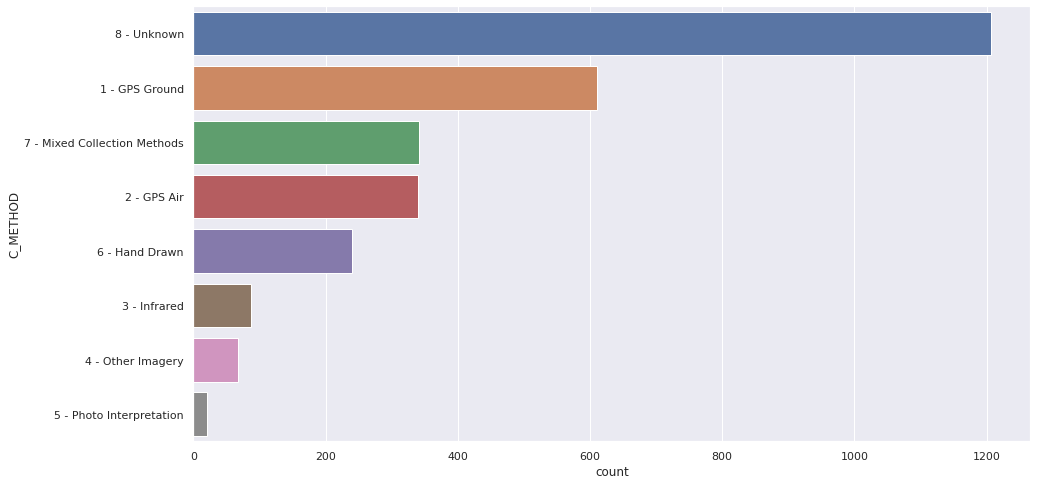

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=df,y='C_METHOD', order = df['C_METHOD'].value_counts().index)

## Data Analysis
Now we can start our data analysis, ask questions from our data and make inferences from our data.

### Fire Incidents Over Time
We can see that the number of wild fire incidents has increased rapid in the recent years. 

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

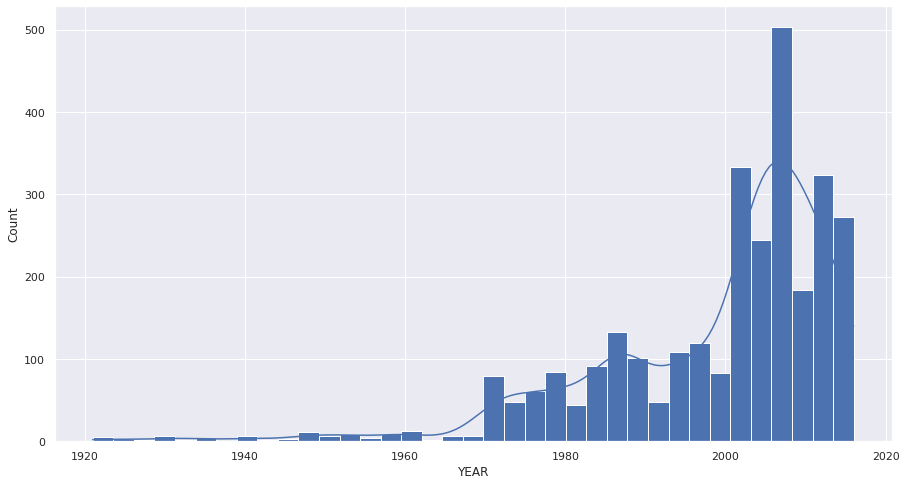

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data = df
            ,x = 'YEAR'
            ,alpha = 1
            ,kde=True
            )

### Fire Durations Over Time
We also notice that duration of an active wildfire has increased in the recent years. That is, recent wildfires in California have been burning for longer durations and. potentially more devastating.

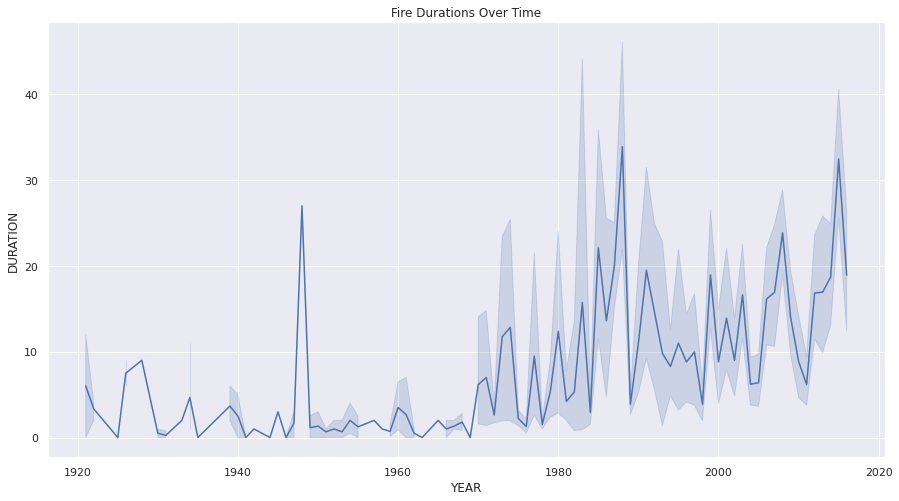

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x ="YEAR", y = "DURATION", data = df).set(title='Fire Durations Over Time')
plt.savefig('fire_duration.png')

### Wildfire Causes
If we check the causes of the wildfire, we see that lightning as the primary cause. But what is also interesting is that other than lightning, all other top causes are man made and preventable.

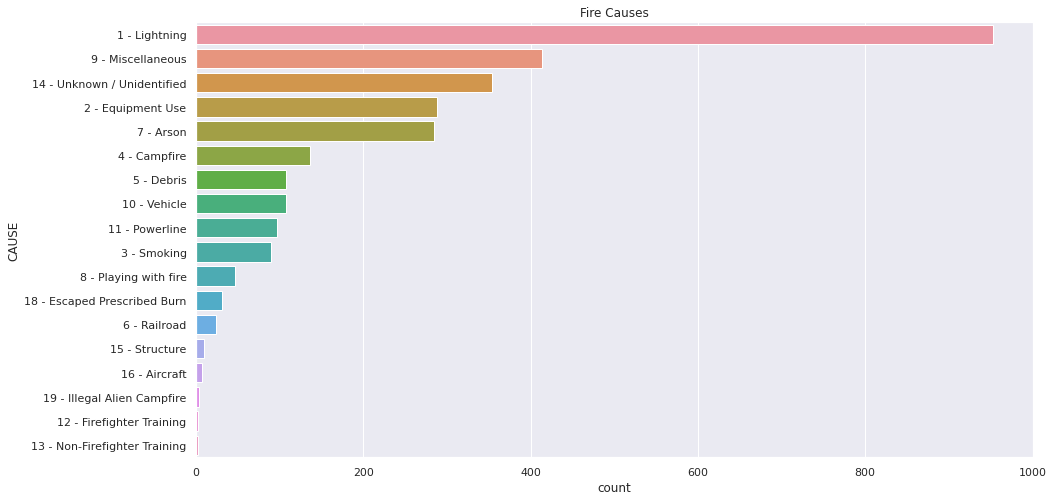

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=df,y='CAUSE',order = df['CAUSE'].value_counts().index).set(title='Fire Causes')
plt.savefig('fire_causes.png')

### Fire Agency Impact
Fire sizes and durations seem to cluster somewhat based on the fire agency responsible for managing the fire.

<AxesSubplot:xlabel='GIS_ACRES', ylabel='DURATION'>

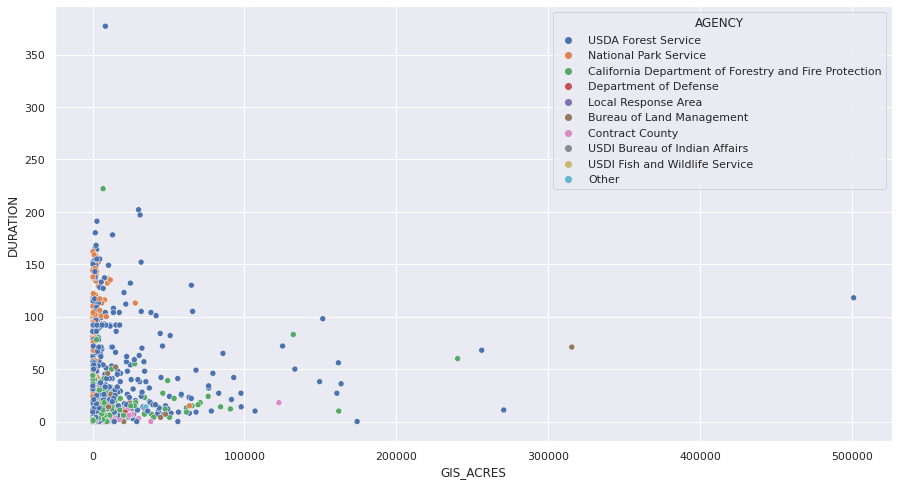

In [23]:
sns.scatterplot(data=df, x='GIS_ACRES', y='DURATION', hue='AGENCY')

## Takeaways
- The number of wild fire incidents have increased significantly over the recent years. This translates to both the duration and the acres destroyed by the fire.
- Outside lightning, most of the major causes of wildfires are man made and hence preventable.
- The fact that fire sizes and durations cluster around the agencies that are responsible for fire management seem to suggest that some agencies have better practices than others when it comes to containment of wildfires.
